# An Introduction to HASC Ballroom Dance Dataset
### Author: Hitoshi MATSUYAMA
### Affiliation: Graduate School of Engineering, Nagoya University, Japan
### contact: hitoshi[_at_]ucl.nuee.nagoya-u.ac.jp

# Description
In this notebook, I'll show a basic analysis of the HASC_BDD.  
Although my paper has presented an LSTM-based classification method, it needs too long time to train the model. Therefore, I'll adopt LightGBM and very basic feature extraction to show how to explore and build a model with the dataset.

# Citation
When you use the dataset, please cite the paper below:

```
@inproceedings{10.1145/3341162.3344852,
author = {Matsuyama, Hitoshi and Hiroi, Kei and Kaji, Katsuhiko and Yonezawa, Takuro and Kawaguchi, Nobuo},
title = {Ballroom Dance Step Type Recognition by Random Forest Using Video and Wearable Sensor},
year = {2019},
isbn = {9781450368698},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/3341162.3344852},
doi = {10.1145/3341162.3344852},
booktitle = {Adjunct Proceedings of the 2019 ACM International Joint Conference on Pervasive and Ubiquitous Computing and Proceedings of the 2019 ACM International Symposium on Wearable Computers},
pages = {774–780},
numpages = {7},
keywords = {datasets, signal processing, machine learning},
location = {London, United Kingdom},
series = {UbiComp/ISWC ’19 Adjunct}
}
```


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
wearable = pd.read_pickle("WearableSensorData_wM_noCut.pkl")
keypoint = pd.read_pickle("KeypointData_woScl_noCut.pkl")

In [3]:
display(wearable.head())
display(keypoint.head())

,id,dancer,video,figure,0_accx,0_accy,0_accz,0_gyrx,0_gyry,0_gyrz,...,4_accz,4_gyrx,4_gyry,4_gyrz,5_accx,5_accy,5_accz,5_gyrx,5_gyry,5_gyrz
1,1,0,0,NotPerforming,10022.882605,-800.708645,-1.577029,153.717323,-94.030796,126.953559,...,-1619.813132,-7032.089031,-659.931807,4750.572121,9802.292693,1618.313204,1799.186769,-453.326652,-886.215568,202.408347
2,2,0,0,NotPerforming,10013.573282,-855.853149,70.969233,126.368089,-104.167488,114.121198,...,-1567.222245,-6112.587081,-659.404469,4295.960500,9771.109127,1554.851846,1786.111200,-237.797477,-866.488238,207.612413
3,3,0,0,NotPerforming,9964.972082,-897.361904,204.145674,100.830641,-119.125917,108.464498,...,-1579.069198,-4535.832588,-651.385223,3772.762099,9873.561627,1590.891790,1625.642225,-145.005261,-1055.300213,235.877465
4,4,0,0,NotPerforming,10061.651831,-886.934818,20.042846,155.727138,-126.202414,72.426919,...,-1617.812802,-2993.979692,-640.187351,3172.508456,9838.610954,1420.551551,1592.054206,-192.900894,-1047.537753,290.692528
5,5,0,0,NotPerforming,10003.590824,-812.241211,-2.962767,86.284727,-121.840660,74.967931,...,-1588.326530,-1772.755289,-581.584021,2635.108439,9764.823526,1342.523892,1537.014055,-159.779615,-975.866509,243.677237


,id,dancer,video,figure,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,...,LSmallToe_x,LSmallToe_y,LHeel_x,LHeel_y,RBigToe_x,RBigToe_y,RSmallToe_x,RSmallToe_y,RHeel_x,RHeel_y
1,1,0,0,NotPerforming,0.610879,0.194879,0.579634,0.324534,0.505237,0.334107,...,0.652255,-0.318501,0.544332,-0.696946,0.488459,-0.530580,0.440095,-0.162745,0.325172,-0.516669
2,2,0,0,NotPerforming,0.600641,0.194879,0.579581,0.323812,0.505073,0.334060,...,0.652208,-0.318733,0.544529,-0.696885,0.488195,-0.531254,0.425840,-0.163297,0.325223,-0.516247
3,3,0,0,NotPerforming,0.600460,0.194644,0.579634,0.322898,0.505018,0.333449,...,0.652115,-0.318998,0.544430,-0.698038,0.488406,-0.531029,0.439947,-0.162907,0.325172,-0.515886
4,4,0,0,NotPerforming,0.600351,0.194492,0.579581,0.322802,0.504909,0.332369,...,0.652115,-0.319098,0.544578,-0.696764,0.488195,-0.532634,0.439799,-0.163800,0.339474,-0.516609
5,5,0,0,NotPerforming,0.600315,0.194464,0.579686,0.321022,0.505018,0.329975,...,0.652115,-0.319429,0.544480,-0.697583,0.503613,-0.531703,0.440342,-0.163394,0.339424,-0.516579


In [4]:
wearable = wearable.fillna("median")

In [5]:
wearable.groupby(["dancer", "video", "figure"]).mean()["0_accx"][0][0]

figure
Aida             11724.494058
Alemana          10362.302685
Fan              10826.101947
FootChange        9607.360724
HandToHandL       9583.887600
HandToHandR      10301.284155
HockyStick        9713.568350
NaturalTop        9292.286381
NewYorkL          9474.034887
NewYorkR         10844.121155
NotPerforming    10324.152559
OpenBasic        10709.994617
OpeningOut       11915.514933
SpotTurn          9574.257402
Name: 0_accx, dtype: float64

In [6]:
figure_dict = {1: "OpenBasic", 2: "FootChange", 3: "Fan", 4: "HockyStick", 5: "NewYorkR", 6: "NewYorkL", 7: "SpotTurn", 8: "NaturalTop", 9: "OpeningOut", 10: "Alemana", 11: "HandToHandR", 12: "HandToHandL", 13: "Aida", 14: "NotPerforming"}
convert_dict = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:5, 8:7, 9:1, 10:8, 11:9, 12:2, 13:3, 14:10, 15:11, 16:12, 17:11, 18:12, 19:13, 20:7, 21:14, 22:14}

In [7]:
def feature_extraction_accgyr(df, figure_length):
    columns = df.columns
    modalities = df[columns[4:]]
    col = modalities.columns
    num_figures = int(len(df) / figure_length)
    features = []
    labels = []
    for f in range(num_figures):
        # pick up data for 1 figure (288 samples)
        m = modalities.iloc[f*figure_length:(f+1)*figure_length]
        f_1fig = []
        # append features for each figure
        # 6 * 6 = 36 modalities per a figure using all sensors
        for c in col:
            f_1fig.append(np.mean(np.array(m[c])))
            f_1fig.append(np.var(np.array(m[c])))
            f_1fig.append(np.argmax(np.array(m[c])))
        features.append(f_1fig)
#         labels.append(df.figure.iloc[f*figure_length])
        labels.append(convert_dict[f+1])
    return features, labels

In [8]:
def feature_extraction_keypoint(df, figure_length):
    columns = df.columns
    modalities = df[columns[4:]]
    col = modalities.columns
    num_figures = int(len(df) / figure_length)
    features = []
    labels = []
    for f in range(num_figures):
        # pick up data for 1 figure (288 samples)
        m = modalities.iloc[f*figure_length:(f+1)*figure_length]
        f_1fig = []
        # append features for each figure
        # 25 * 2 = 50 modalities per a figure using all sensors
        for c in col:
            f_1fig.append(np.mean(m[c]))
            f_1fig.append(np.var(m[c]))
        features.append(f_1fig)
#         labels.append(df.figure.iloc[f*figure_length])
        labels.append(convert_dict[f+1])
    return features, labels

In [9]:
dancer_l = range(7)
video_l = range(20)
# each figure contains 288 samples
figure_length = 288

# features, labels of all dancers & all video
features_wearable_dancers = []
labels_wearable_dancers = []
features_keypoint_dancers = []
labels_keypoint_dancers = []

for d in dancer_l:
    # features, labels of all video
    features_wearable_videos = []
    labels_wearable_videos = []
    features_keypoint_videos = []
    labels_keypoint_videos = []
    
    for v in video_l:
        # pick up 1 record from wearable sensor data
        w = wearable[(wearable.dancer == d) & (wearable.video == v)]
        # choose performing labels
        w = w[w.figure != "NotPerforming"]
        # feature extraction
        features_wearable, labels_wearable = feature_extraction_accgyr(w, figure_length)

        
        # pick up 1 record from keypoint data
        k = keypoint[(keypoint.dancer == d) & (keypoint.video == v)]
        k = k[k.figure != "NotPerforming"]
        # feature extraction
        features_keypoint, labels_keypoint = feature_extraction_keypoint(k, figure_length)
        
        # append features, labels of 1 video
        features_wearable_videos.append(features_wearable)
        labels_wearable_videos.append(labels_wearable)
        features_keypoint_videos.append(features_keypoint)
        labels_keypoint_videos.append(labels_keypoint)
        
    # append features, labels of 1 dancer
    features_wearable_dancers.append(features_wearable_videos)
    labels_wearable_dancers.append(labels_wearable_videos)
    features_keypoint_dancers.append(features_keypoint_videos)
    labels_keypoint_dancers.append(labels_keypoint_videos)
        


In [10]:
w

,id,dancer,video,figure,0_accx,0_accy,0_accz,0_gyrx,0_gyry,0_gyrz,...,4_accz,4_gyrx,4_gyry,4_gyrz,5_accx,5_accy,5_accz,5_gyrx,5_gyry,5_gyrz
6454977,6454977,6,19,OpenBasic,10084.205040,336.343429,-796.442918,-238.630966,-138.828550,-1.847226,...,-232.473879,-333.952654,638.544199,-234.462884,9546.502970,-3534.123922,-1018.432224,14199.094753,4119.559746,-1986.985395
6454978,6454978,6,19,OpenBasic,10161.502738,385.096770,-812.240019,-131.154183,-106.385185,12.025321,...,-318.003375,-355.587135,590.608898,-283.707461,7387.693122,-5137.214042,-4339.942716,-356.622295,319.070061,306.852685
6454979,6454979,6,19,OpenBasic,10093.279394,350.346989,-827.779789,-120.841034,-105.496050,0.195161,...,-365.080497,-383.906844,535.214785,-330.186924,7418.452036,-5134.682572,-4316.917397,-361.834967,377.692073,266.712837
6454980,6454980,6,19,OpenBasic,10105.632166,332.573801,-830.162181,-87.063954,-69.142075,-42.675561,...,-415.828555,-272.679599,497.464461,-381.966199,7409.675302,-5120.085055,-4424.486508,-349.002195,329.080087,231.503303
6454981,6454981,6,19,OpenBasic,10139.537568,280.528859,-798.520257,-184.776168,-124.702146,-49.070348,...,-333.625360,-178.348246,487.390422,-393.306305,7271.810712,-5109.626723,-4478.502093,-319.951322,311.478229,216.710086
6454982,6454982,6,19,OpenBasic,10108.575478,324.076662,-767.939942,-215.236113,-140.782672,-75.109124,...,-328.574264,-101.202871,469.097169,-316.266189,7329.013934,-5214.542003,-4483.734810,-313.122028,331.945527,228.646894
6454983,6454983,6,19,OpenBasic,10127.983368,349.029534,-827.770758,-101.395969,-111.961143,-98.426588,...,-310.715744,-158.049048,418.598283,-258.131129,7365.453228,-5188.964481,-4454.602645,-281.628563,367.289586,180.462711
6454984,6454984,6,19,OpenBasic,10065.591393,336.561501,-847.320429,13.899464,-110.917699,-124.923259,...,-367.437040,-131.746605,398.227990,-260.671504,7465.885697,-5118.070584,-4356.348971,-335.556855,445.473241,147.826123
6454985,6454985,6,19,OpenBasic,10072.271235,317.063170,-863.506862,-45.579987,-99.456564,-115.039693,...,-241.328575,-279.275746,387.549063,-228.391463,7504.289420,-5151.558662,-4191.811527,-278.594442,328.244292,120.302472
6454986,6454986,6,19,OpenBasic,10156.150069,350.837403,-834.933875,52.540586,-112.304092,-118.371007,...,-235.336209,-318.701672,392.612637,-314.421565,7406.491901,-5141.691372,-4495.253823,-136.188265,189.345191,96.634298


# classification

In [11]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
features_wearable = np.array(features_wearable_dancers)
labels_wearable = np.array(labels_wearable_dancers)
features_keypoint = np.array(features_keypoint_dancers)
labels_keypoint = np.array(labels_keypoint_dancers)

In [13]:
# shape: dancers, videos, figures, feature vectors
print(features_wearable.shape)
print(labels_wearable.shape)
print(features_keypoint.shape)
print(labels_keypoint.shape)

(7, 20, 20, 108)
(7, 20, 20)
(7, 20, 20, 100)
(7, 20, 20)


In [14]:
features_wearable = features_wearable.reshape(features_wearable.shape[0]*features_wearable.shape[1]*features_wearable.shape[2], features_wearable.shape[3])
labels_wearable = labels_wearable.reshape(labels_wearable.shape[0]*labels_wearable.shape[1]*labels_wearable.shape[2], 1)
features_keypoint = features_keypoint.reshape(features_keypoint.shape[0]*features_keypoint.shape[1]*features_keypoint.shape[2], features_keypoint.shape[3])
labels_keypoint = labels_keypoint.reshape(labels_keypoint.shape[0]*labels_keypoint.shape[1]*labels_keypoint.shape[2], 1)

In [15]:
# shape: dancers*videos*figures, feature vectors
print(features_wearable.shape)
print(labels_wearable.shape)
print(features_keypoint.shape)
print(labels_keypoint.shape)

(2800, 108)
(2800, 1)
(2800, 100)
(2800, 1)


In [16]:
features_wearable[0][2].dtype

dtype('float64')

### wearable sensors

In [17]:
import collections
X = features_wearable
y = labels_wearable.reshape(-1)
# convert string labels to int
le = LabelEncoder()
le = le.fit(y)
y = le.transform(y)
print(X.shape)
print(y.shape)
print(collections.Counter(list(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgbm_params = {
    'objective': 'multiclass',
    'num_class': 13,
}
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)
# print accuracy
accuracy = sum(y_test == y_pred_max) / len(y_test)
print(accuracy)

(2800, 108)
(2800,)
Counter({0: 280, 1: 280, 2: 280, 4: 280, 6: 280, 10: 280, 11: 280, 3: 140, 5: 140, 7: 140, 8: 140, 9: 140, 12: 140})
(2100, 108)
(2100,)
[1]	valid_0's multi_logloss: 2.31984
[2]	valid_0's multi_logloss: 2.19001
[3]	valid_0's multi_logloss: 2.08968
[4]	valid_0's multi_logloss: 2.00379
[5]	valid_0's multi_logloss: 1.93165
[6]	valid_0's multi_logloss: 1.8687
[7]	valid_0's multi_logloss: 1.81341
[8]	valid_0's multi_logloss: 1.76158
[9]	valid_0's multi_logloss: 1.71194
[10]	valid_0's multi_logloss: 1.66996
[11]	valid_0's multi_logloss: 1.62876
[12]	valid_0's multi_logloss: 1.5915
[13]	valid_0's multi_logloss: 1.56052
[14]	valid_0's multi_logloss: 1.52847
[15]	valid_0's multi_logloss: 1.50217
[16]	valid_0's multi_logloss: 1.47771
[17]	valid_0's multi_logloss: 1.4549
[18]	valid_0's multi_logloss: 1.43123
[19]	valid_0's multi_logloss: 1.40901
[20]	valid_0's multi_logloss: 1.38777
[21]	valid_0's multi_logloss: 1.36951
[22]	valid_0's multi_logloss: 1.35542
[23]	valid_0's mult

In [18]:
from sklearn.ensemble import RandomForestClassifier
X = features_wearable
y = labels_wearable.reshape(-1)
# convert string labels to int
le = LabelEncoder()
le = le.fit(y)
y = le.transform(y)

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)
print(accuracy)

(2800,)
0.65


### Keypoint

In [19]:
X = features_keypoint
y = labels_keypoint.reshape(-1)
# convert string labels to int
le = LabelEncoder()
le = le.fit(y)
y = le.transform(y)

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgbm_params = {
    'objective': 'multiclass',
    'num_class': 13,
}
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)
# print accuracy
accuracy = sum(y_test == y_pred_max) / len(y_test)
print(accuracy)

(2800,)
[1]	valid_0's multi_logloss: 2.3812
[2]	valid_0's multi_logloss: 2.2793
[3]	valid_0's multi_logloss: 2.1949
[4]	valid_0's multi_logloss: 2.11973
[5]	valid_0's multi_logloss: 2.05974
[6]	valid_0's multi_logloss: 2.00474
[7]	valid_0's multi_logloss: 1.96158
[8]	valid_0's multi_logloss: 1.92175
[9]	valid_0's multi_logloss: 1.88427
[10]	valid_0's multi_logloss: 1.85262
[11]	valid_0's multi_logloss: 1.8181
[12]	valid_0's multi_logloss: 1.79183
[13]	valid_0's multi_logloss: 1.76362
[14]	valid_0's multi_logloss: 1.73697
[15]	valid_0's multi_logloss: 1.71497
[16]	valid_0's multi_logloss: 1.68911
[17]	valid_0's multi_logloss: 1.66944
[18]	valid_0's multi_logloss: 1.64725
[19]	valid_0's multi_logloss: 1.62941
[20]	valid_0's multi_logloss: 1.61387
[21]	valid_0's multi_logloss: 1.59852
[22]	valid_0's multi_logloss: 1.5861
[23]	valid_0's multi_logloss: 1.57063
[24]	valid_0's multi_logloss: 1.55724
[25]	valid_0's multi_logloss: 1.54385
[26]	valid_0's multi_logloss: 1.53218
[27]	valid_0's mul

## Hybrid

In [20]:
# shape: dancers*videos*figures, feature vectors
print(features_wearable.shape)
print(labels_wearable.shape)
print(features_keypoint.shape)
print(labels_keypoint.shape)

(2800, 108)
(2800, 1)
(2800, 100)
(2800, 1)


In [21]:
features_hybrid = np.concatenate([features_wearable, features_keypoint], 1)
labels_hybrid = labels_wearable

In [22]:
X = features_hybrid
y = labels_hybrid.reshape(-1)
# convert string labels to int
le = LabelEncoder()
le = le.fit(y)
y = le.transform(y)

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgbm_params = {
    'objective': 'multiclass',
    'num_class': 13,
}
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)
# print accuracy
accuracy = sum(y_test == y_pred_max) / len(y_test)
print(accuracy)

(2800,)
[1]	valid_0's multi_logloss: 2.34024
[2]	valid_0's multi_logloss: 2.21486
[3]	valid_0's multi_logloss: 2.10987
[4]	valid_0's multi_logloss: 2.0246
[5]	valid_0's multi_logloss: 1.94335
[6]	valid_0's multi_logloss: 1.87255
[7]	valid_0's multi_logloss: 1.81167
[8]	valid_0's multi_logloss: 1.75477
[9]	valid_0's multi_logloss: 1.70533
[10]	valid_0's multi_logloss: 1.65976
[11]	valid_0's multi_logloss: 1.61912
[12]	valid_0's multi_logloss: 1.58265
[13]	valid_0's multi_logloss: 1.54886
[14]	valid_0's multi_logloss: 1.5121
[15]	valid_0's multi_logloss: 1.48385
[16]	valid_0's multi_logloss: 1.45579
[17]	valid_0's multi_logloss: 1.43075
[18]	valid_0's multi_logloss: 1.40416
[19]	valid_0's multi_logloss: 1.38166
[20]	valid_0's multi_logloss: 1.36262
[21]	valid_0's multi_logloss: 1.34216
[22]	valid_0's multi_logloss: 1.32267
[23]	valid_0's multi_logloss: 1.30637
[24]	valid_0's multi_logloss: 1.28858
[25]	valid_0's multi_logloss: 1.27477
[26]	valid_0's multi_logloss: 1.26214
[27]	valid_0's 

### Confusion matrix of the hybrid classification

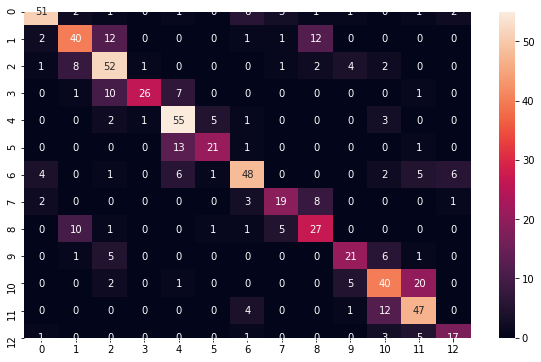

In [23]:
cm = confusion_matrix(y_test, y_pred_max)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)